#### **Project Title:**  ***"EDA and Visualization"***
##### **Dataset:** *"Titanic Dataset"*
##### **Step 01:** Loading Important Libraries

In [6]:
#For data manipulation.
import pandas as pd  
#For numerical operations.
import numpy as np  
#For data visualization. 
import matplotlib.pyplot as plt  
#For advanced visualizations.
import seaborn as sns  

##### **Step 02:** Loading Dataset

In [7]:
#Loading the titanic dataset.  
df = pd.read_csv("titanic_dataset.csv")  
#Displaying basic information.
print(df.info())  
#Showing the first five rows of the dataset.  
print(df.head())  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB
None
   PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                   

##### **Step 03:** Data Cleaning

In [8]:
#Handling missing values.
#Checking missing values.
print(df.isnull().sum())
#Imputing missing values.
#Replacing missing ages with median age.
df['Age'].fillna(df['Age'].median(), inplace=True)  
#Replacing missing embarkation with mode.
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)  
#Droping 'Cabin' due to too many missing values.
df.drop(columns=['Cabin'], inplace=True)  

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


C:\Users\wajeeha\AppData\Local\Temp\ipykernel_13656\2734417874.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\wajeeha\AppData\Local\Temp\ipykernel_13656\2734417874.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

F

In [9]:
#Removing duplicate rows from the dataset to ensure data consistency.
df.drop_duplicates(inplace=True) 

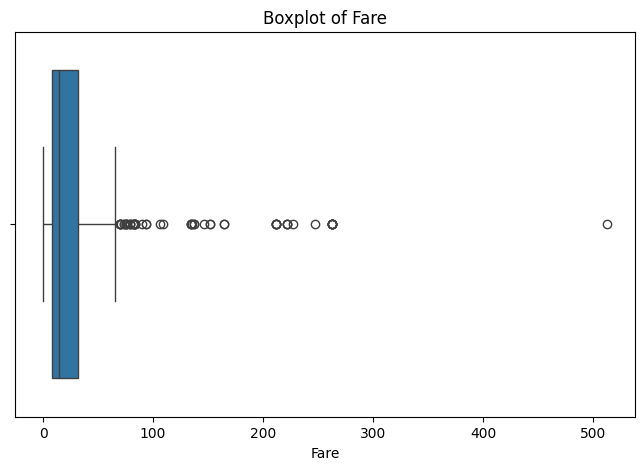

In [10]:
#Detecting outliers in the 'Fare' column using a boxplot.
plt.figure(figsize=(8, 5))  
#Boxplot helps visualizing the spread and potential outliers.
sns.boxplot(x=df['Fare'])  
plt.title('Boxplot of Fare')  
plt.show()  
#Removing outliers using the Interquartile Range (IQR) method  
#First quartile (25th percentile).
Q1 = df['Fare'].quantile(0.25)  
#Third quartile (75th percentile).
Q3 = df['Fare'].quantile(0.75)   
#Computing the interquartile range.
IQR = Q3 - Q1    
#Defining lower and upper bounds for detecting outliers.
lower_bound = Q1 - 1.5 * IQR  
upper_bound = Q3 + 1.5 * IQR  
#Filtering the dataset to keep only values within the acceptable range. 
df = df[(df['Fare'] >= lower_bound) & (df['Fare'] <= upper_bound)]  

##### **Step 04:** Visualization

C:\Users\wajeeha\AppData\Local\Temp\ipykernel_13656\1043247126.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette="viridis")
C:\Users\wajeeha\AppData\Local\Temp\ipykernel_13656\1043247126.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette="viridis")
C:\Users\wajeeha\AppData\Local\Temp\ipykernel_13656\1043247126.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette="viridis")


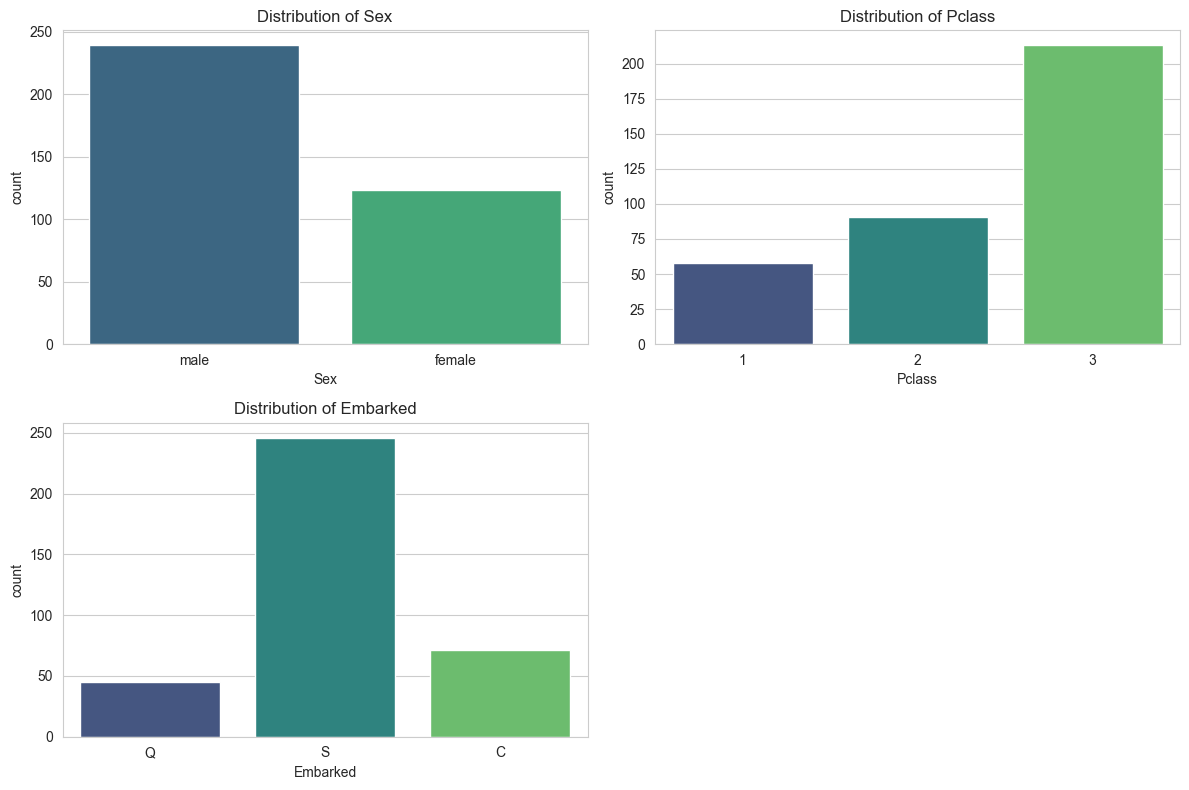

In [11]:
#Setting the visualization style to improve readability.
sns.set_style("whitegrid")  
#Defining categorical columns for visualization.
categorical_cols = ['Sex', 'Pclass', 'Embarked']  
#Creating a figure for multiple subplots.
plt.figure(figsize=(12, 8))  
#Looping through each categorical column and create a bar chart.
for i, col in enumerate(categorical_cols, 1):  
    #Arranging subplots in a grid.
    plt.subplot(2, 2, i)    
    #Countploting for categorical variable distribution.
    sns.countplot(x=df[col], palette="viridis")    
    #Setting title for each plot.
    plt.title(f'Distribution of {col}')   
#Adjusting layout to prevent overlapping.
plt.tight_layout()  
#Displaying the plots.
plt.show()  

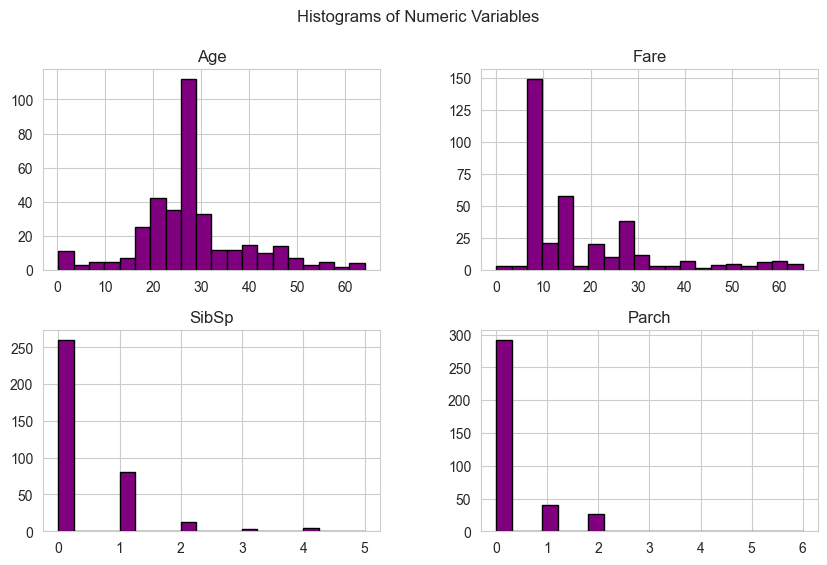

In [12]:
#Histograms for numeric features.
#Defining numeric columns to visualize their distributions.
numeric_cols = ['Age', 'Fare', 'SibSp', 'Parch']  
#Plotting histograms for each numeric column  .
df[numeric_cols].hist(figsize=(10, 6), bins=20, color='purple', edgecolor='black')  
#Setting a title for the entire figure.
plt.suptitle("Histograms of Numeric Variables")  
#Displaying the histograms.
plt.show()  

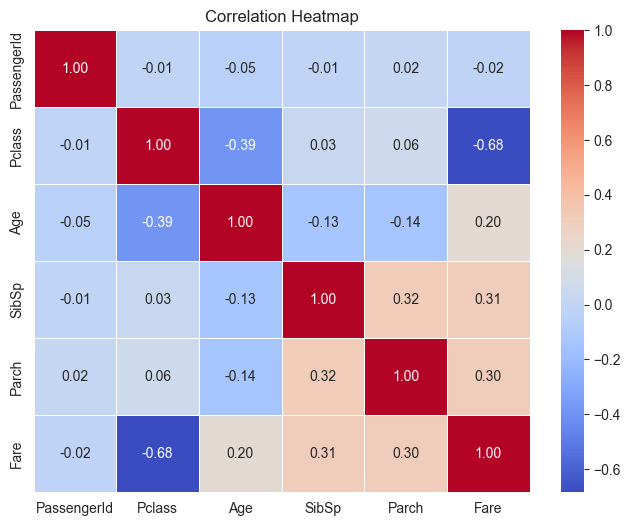

In [13]:
#Correlation heatmap for numeric features.
#Select only numeric columns from the dataset for correlation analysis.
numeric_df = df.select_dtypes(include=['number'])  
#Computing the correlation matrix to understand relationships between numeric features. 
corr_matrix = numeric_df.corr()  
#Creating a heatmap to visualize the correlation matrix.
#Setting figure size.
plt.figure(figsize=(8, 6))   
#Plotting heatmap with annotations.
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)  
#Setting the title of the heatmap.
plt.title("Correlation Heatmap")  
#Displaying the heatmap.
plt.show()  

### **Summary Insights: EDA and Visualization of the Titanic Dataset**  

##### **1. Missing Values:**  
- The **'Cabin'** column had too many missing values and was dropped.  
- **'Age'** was imputed with the **median**, while **'Embarked'** was filled with the **mode**.  

##### **2. Duplicate and Outlier Handling:**  
- Duplicate rows were **removed** to ensure data integrity.  
- Outliers in the **'Fare'** column were identified and removed using the **IQR method**, improving data consistency.  

##### **3. Categorical Variables (Bar Charts):**  
- More **males** survived than females, but a higher **percentage of females survived** compared to males.  
- Most passengers were from **Pclass 3 (lower-class seats)**, which had the **lowest survival rate**.  
- The majority of passengers embarked from **Southampton (S)**.  

##### **4. Numeric Variables (Histograms):**  
- **'Age'** distribution is **right-skewed**, with most passengers between **20-40 years**.  
- **'Fare'** has a highly **right-skewed distribution**, indicating a few passengers paid significantly higher fares.  
- Most passengers had **0-1 siblings/spouses** and **0-1 parents/children** aboard.  

##### **5. Correlation Heatmap:**  
- **Strong correlation** between **'Pclass' and 'Fare'** (higher-class tickets cost more).  
- **'SibSp' and 'Parch'** show a slight correlation, meaning families often traveled together.  
- **'Survived' has a weak correlation with numeric features**, suggesting survival is influenced by multiple factors, including class and gender.  

#### **Conclusion:**  
- **Class and gender played a crucial role in survival rates**, with **women and first-class passengers having a higher chance of survival**.  
- **Passengers with large families had a lower survival rate**, possibly due to evacuation challenges.  
- **Most passengers were in the lower class, and fares varied widely, showing socio-economic differences.**  
***